In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [59]:
# функция плотности вероятности извлечь деталь из конкретного станка
def dens_proba(mu, sigma, x):
    return (math.exp((-(x-mu)**2)/(2*sigma**2)) / (sigma*math.sqrt(2*math.pi)))

# функция определения вероятности принадлежности деталей к станку
def x_proba(X, w1, mu1, sigma1, w2, mu2, sigma2):
    X_proba = []
    for x in X:
        p_1_x = dens_proba(mu1, sigma1, x)
        p_2_x = dens_proba(mu2, sigma2, x)
        p_x = w1*p_1_x + w2*p_2_x
        p_x_1 = w1*p_1_x/p_x
        p_x_2 = w1*p_2_x/p_x
        X_proba.append([p_x_1, p_x_2])
    return X_proba

# функция отнесения изделия к первому либо второму станку
def x_pred(X_proba, limit_proba):
    X_pred = []
    for x in X_proba:
        if x[0] >= limit_proba:
            X_pred.append(1)
        else:
            X_pred.append(2)
    return np.array(X_pred)

# функция построения графиков
def graph(X, y, X_pred, mu1, sigma1, m2, sigma2):
    true_pred = []
    false_pred_1 = []
    false_pred_2 = []
    
    for i in range(X.shape[0]):
        if X_pred[i] == y[i]:
            true_pred.append([X[i], -0.025])
        elif y[i] == 1:
            false_pred_1.append([X[i], -0.0075])
        else:
            false_pred_2.append([X[i], -0.015])
            
    true_pred = np.array(true_pred)
    false_pred_1 = np.array(false_pred_1)
    false_pred_2 = np.array(false_pred_2)
    
    x_theory = np.linspace(42, 85, 20000)
    y_theory_1, y_theory_2 = [], []
    for x in x_theory:
        y_theory_1.append(dens_proba(mu1, sigma1, x))
        y_theory_2.append(dens_proba(mu2, sigma2, x))
        
    plt.figure(figsize=(18,8), facecolor='w')
    plt.plot(x_theory, y_theory_1, color='green', lw=2,
             label='Theoretical probability density for machine 1')
    plt.plot(x_theory, y_theory_2, color='firebrick', lw=2,
             label='Theoretical probability density for machine 2')
    plt.hist(X[:N1], bins='auto', color='#539caf', density=True, alpha=0.35,
             label='machine tool products 1')
    plt.hist(X[N1:N+1], bins='auto', color='sandybrown', density=True, alpha=0.75,
             label='machine tool products 2')
    plt.plot(mu1, 0, 'o', markersize=11, color='blue', label='Mu 1')
    plt.plot(mu2, 0, 'o', markersize=11, color='red', label='Mu 2')
    
    plt.plot([mu1 - sigma1, mu1 - sigma1], [0,0.85*np.max(y_theory_1)],
             ':', lw = 3, color = 'blue', alpha = 0.55, label = 'Mu1 - sigma1')
    plt.plot([mu1 + sigma1, mu1 + sigma1], [0,0.85*np.max(y_theory_1)],
             ':', lw = 3, color = 'blue', alpha = 0.55, label = 'Mu1 + sigma1')
    plt.plot([mu2 - sigma2, mu2 - sigma2], [0,0.85*np.max(y_theory_2)],
             ':', lw = 3, color = 'red', alpha = 0.55, label = 'Mu2 - sigma2')
    plt.plot([mu2 + sigma2, mu2 + sigma2], [0,0.85*np.max(y_theory_2)],
             ':', lw = 3, color = 'red', alpha = 0.55, label = 'Mu2 + sigma2')

    plt.plot([mu1 - 2 * sigma1, mu1 - 2 * sigma1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw = 2.5, color = 'blue', alpha = 0.35, label = 'Mu1 - 2*sigma1')
    plt.plot([mu1 + 2 * sigma1, mu1 + 2 * sigma1], [0, 0.9*0.5 * np.max(y_theory_1)],
             ':', lw = 2.5, color = 'blue', alpha = 0.35, label = 'Mu1 + 2*sigma1')
    plt.plot([mu2 - 2 * sigma2, mu2 - 2 * sigma2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw = 2.5, color = 'red', alpha = 0.35, label = 'Mu2 - 2*sigma2')
    plt.plot([mu2 + 2 * sigma2, mu2 + 2 * sigma2], [0, 0.9*0.5 * np.max(y_theory_2)],
             ':', lw = 2.5, color = 'red', alpha = 0.35, label = 'Mu2 + 2*sigma2')
    
    plt.plot(true_pred[:,0],true_pred[:,1], 'o', markersize=3, color='green', alpha=0.2,
             label='right answers')
    plt.plot(false_pred_1[:,0], false_pred_1[:,1], 'o', markersize=2.5, color='blue',
             alpha=0.2, label='errors 1')
    plt.plot(false_pred_2[:,0], false_pred_2[:,1], 'o', markersize=2.5, color='red', alpha=0.3,
             label='errors 2')
    
    plt.xlabel('Caliber')
    plt.ylabel('Probability density')
    plt.legend()
    plt.show()
    

In [34]:
# сформируем начальные условия
# количество произведенных деталей
N1 = 6000
N2 = 4000
N = N1 + N2

# стандартный диаметр отверстий со станка № 1
mu1 = 64
# стандартное отклонение диаметра на станке № 1
sigma1 = 4

# стандартный диаметр отверстий со станка № 2
mu2 = 52
# стандартное отклонение диаметра на станке № 2
sigma2 = 2

Доля верно определенных изделий: 0.976

Граик №1


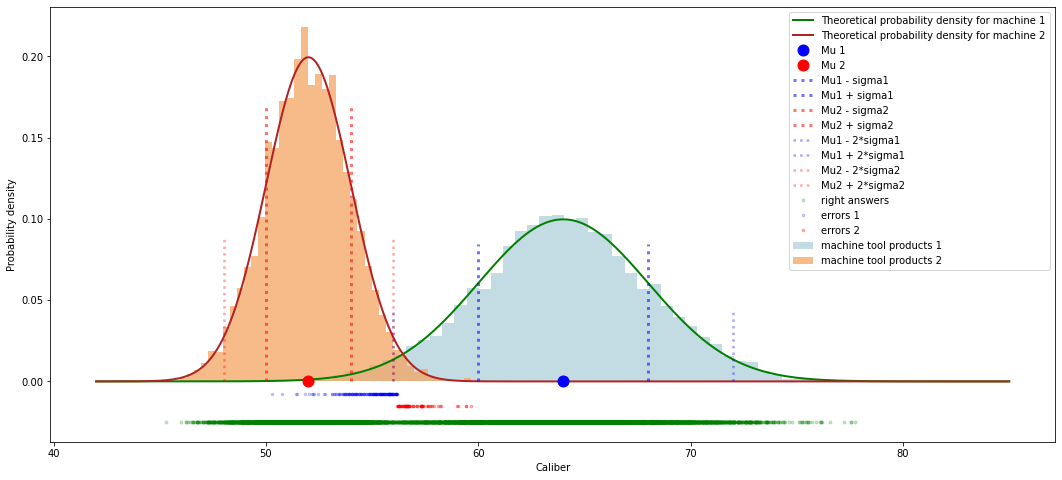

In [71]:
X = np.zeros(N)
#np.random.seed(seed=42)
# инициализируем детали, производства станка №1 и №2
X[:N1] = np.random.normal(loc=mu1, scale=sigma1, size=N1)
X[N1:N+1] = np.random.normal(loc=mu2, scale=sigma2, size=N2)

# инициализируем вектор ответов
y = np.zeros(N)
y[:N1] = 1
y[N1:N+1] = 2

# определим априорные вероятности извлечь изделие, произведенное на станке №1 или №2
w1 = N1/N
w2 = N2/N

# для каждой детали определим вероятность принадлежности к тому или иному станку
X_proba = x_proba(X, w1, mu1, sigma1, w2, mu2, sigma2)

# установим порог вероятности, при достижении которого, изделие будет относиться к тому или иному станку
limit_proba = 0.5

# определим принадлежность детали к станку
X_pred = x_pred(X_proba, limit_proba)

# определим качество нашего алгоритма
print("Доля верно определенных изделий:",round(accuracy_score(y,X_pred),3))
print()
print('Граик №1')
graph(X, y, X_pred, mu1, sigma1, mu2, sigma2)

Что мы только что сделали? Мы сгенерировали псевдослучайным образом 10000 значений, описываемых нормальным распределением, из них 6000 значений с математическим ожиданием в 64 мм и стандартным отклонением 4 мм, 4000 значений с математическим ожиданием равным 52 мм и стандартным отклонением в 2 мм. Далее, в соответствии с вышеуказанным алгоритмом, для каждой детали определили вероятность ее производства на станке №1 или №2. После этого выбрали гипотезу о производстве изделия на том или ином станке в зависимости от того, какая гипотеза имеет большую вероятность. И наконец сравнили результаты нашего алгоритма с истинными ответами.

На выходе мы получили долю правильных ответов — 0.986. В целом это очень неплохо, учитывая, что обучение мы проводили без использования истинных ответов.

Посмотрим на график. На что рекомендуется обратить внимание? Посмотрите, где расположены не верно определенные алгоритмом изделия.

Во-первых, мы видим ошибки алгоритма только в той области, где изделия, произведенные на разных станках, имеют один и тот же диаметр. Это выглядит вполне логичным.

Во-вторых, мы видим, что алгоритм ошибается только в тех объектах, которые больше всего удалены от истинного среднего значения объектов и при этом находятся достаточно близко к ложному центру.

Но самое интересное в том, что проблемы начинаются в основном, после пересечения значений приблизительно равных $\mu +- 2\sigma$, конкретно в нашем случае на пересечении $\mu_1 - 2\sigma_1$ и $\mu_2 + 2\sigma_2$

In [74]:
# функция определения плотности вероятности извлечь деталь, произведенную заданном на станке
# то есть мы задаем параметры станка: мат.ожидание, среднее кв. отклонение
def gaus_func_02(k, m, x, mu, sigma):
    pj_xi = []
    for j in range(k):
        det_sigma_j = np.linalg.det(sigma[j])
        factor_1 = 1 / (((2 * math.pi)**(k/2)) * ((det_sigma_j)**0.5))
        factor_2 = []
        for i in x:
# обратим внимание на то, что запись в коде отличается от записи показателя экспоненты в обшепринятой функции
# в общепринятом виде первым множетелем идет транспонированная матрица центрированных значений
# у нас наоборот. Это связано с тем, что мы изначально использовали иной формат
# спишем это на технические обстоятельства
            factor_2.append(math.e**float(
            -0.5 * np.matrix(i - mu[j]) * np.matrix(np.linalg.inv(sigma[j])) * np.matrix(i - mu[j]).T))
        pj_xi.append(factor_1 * np.array(factor_2))
    return np.array(pj_xi)

# напишем функцию определения вероятности того, что извлеченный объект относится к кластеру №1 и №2
def proba_func_02(pjxi, w, k):
    # для начала определим вероятность извлечь объект из всей совокупности данных
    P_X = []
    for j in range(k):
        P_X.append(w[j] * pjxi[j])
    P_X = np.sum(np.array(P_X), axis = 0)
    # теперь определим вероятность того, что извлеченный объект относится к кластеру №1 и №2
    P_J_X = []
    for j in range(k):
        P_J_X.append(w[j] * pjxi[j] / P_X)
    return np.array(P_J_X)

# напишем функцию отнесения изделия к тому или станку
def pred_x_02(proba_X, limit_proba):
    pred_X = []
    for x in proba_X[0]:
        if x >= limit_proba:
            pred_X.append(1)
        else:
            pred_X.append(2)
    return np.array(pred_X)

# напишем функцию построения графика с распределением изделий по станкам в соответствии с алгоритмом
def graph_02_algorithm(pred_X, mu):
    # преобразуем массив данных
    pred_X = np.array(pred_X)

    # запишем параметры изделий, в раздельные массивы в соответствии с определением станка алгоритмом
    answers_1 = []
    answers_2 = []

    for i in range(pred_X.shape[0]):
        if pred_X[i] == 1:
            answers_1.append(X[i])
        else:
            answers_2.append(X[i])
    
    print('График "Распределение изделий в соответствии с алгоритмом"')
    plt.figure(figsize=(16, 6))  
    plt.plot(
        np.array(answers_1)[:,0], np.array(answers_1)[:,1], 'o', alpha = 0.7, color='sandybrown', label = 'Produced on machine #1')
    plt.plot(
        np.array(answers_2)[:,0], np.array(answers_2)[:,1], 'o', alpha = 0.45, color = 'darkblue', label = 'Produced on machine #2')
    plt.plot(mu[0][0], mu[0][1], 'o', markersize = 16, color = 'red', label = 'Mu 1')
    plt.plot(mu[1][0], mu[1][1], 'o',  markersize = 16, color = 'slateblue', label = 'Mu 2')
    plt.xlabel('Diameter')
    plt.ylabel('Weight')
    plt.legend()
    plt.show()
    
# напишем функцию построения графика с истинным распределением изделий по станкам
def graph_02_true(X, mu):
    print('График "Истинное распределение изделий"')
    plt.figure(figsize=(16, 6))  
    plt.plot(
        X[0:N1,0], X[0:N1,1], 'o', alpha = 0.7, color='sandybrown', label = 'Produced on machine #1')
    plt.plot(
        X[N1:N,0], X[N1:N,1], 'o', alpha = 0.45, color = 'darkblue', label = 'Produced on machine #2')
    plt.plot(mu[0][0], mu[0][1], 'o', markersize = 16, color = 'red', label = 'Mu 1')
    plt.plot(mu[1][0], mu[1][1], 'o',  markersize = 16, color = 'slateblue', label = 'Mu 2')
    plt.xlabel('Diameter')
    plt.ylabel('Weight')
    plt.legend()
    plt.show()

In [75]:
# количество станков
k = 2

# количество деталей изготовленных на станке №1
N1 = 6000
# количество деталей изготовленных на станке №2
N2 = 4000
N = N1+N2

# количество признаков (диаметр и вес)
m = 2

# диаметр изделия станка №1
mu_1_1 = 64.
# вес изделия станка №1
mu_1_2 = 14.
# стандартные отклонения
sigma_1_1 = 3.5
sigma_1_2 = 1.

# диаметр изделия станка №2
mu_2_1 = 52.
# вес изделия станка №2
mu_2_2 = 9.5
# стандартные отклонения
sigma_2_1 = 2.
sigma_2_2 = 0.7

Доля верно определенных изделий: 0.998

График "Распределение изделий в соответствии с алгоритмом"


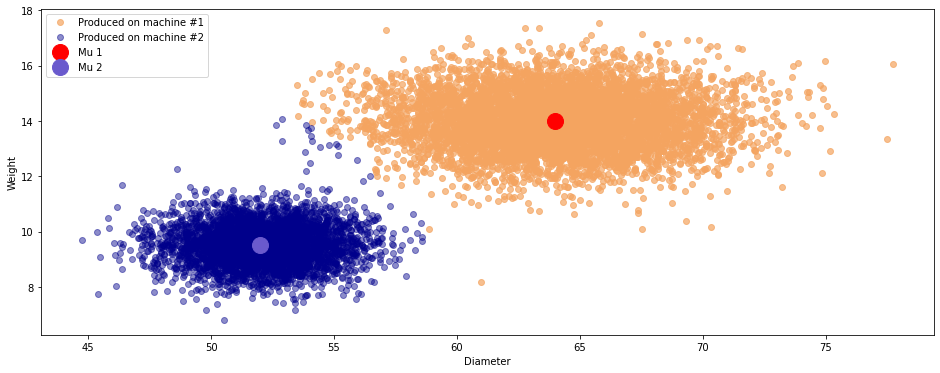

График "Истинное распределение изделий"


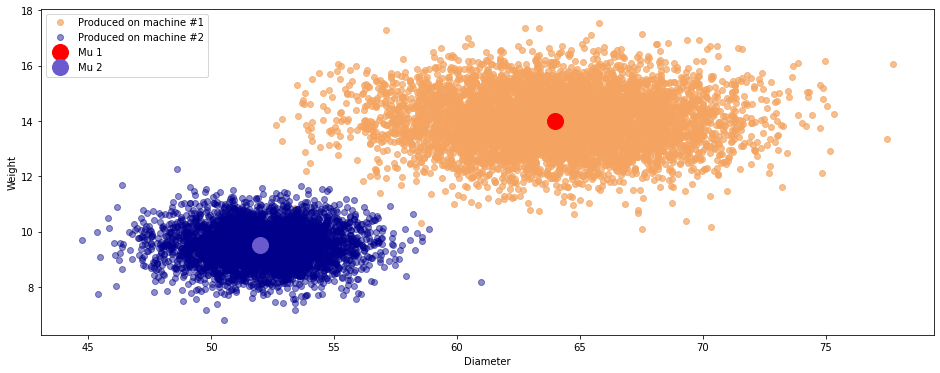

In [78]:
X = np.zeros((N, m))
np.random.seed(seed=42)
# инициализируем данные по деталям, производства станка №1
X[:N1, 0] = np.random.normal(loc=mu_1_1, scale=sigma_1_1, size=N1)
X[:N1, 1] = np.random.normal(loc=mu_1_2, scale=sigma_1_2, size=N1)
# инициализируем детали, производства станка №2
X[N1:N+1, 0] = np.random.normal(loc=mu_2_1, scale=sigma_2_1, size=N2)
X[N1:N+1, 1] = np.random.normal(loc=mu_2_2, scale=sigma_2_2, size=N2)

# зафиксируем правильные ответы (для оценки качества алгоритма, в обучении не используется)
y = np.zeros((N))
y[:N1] = np.array((1))
y[N1:N+1] = np.array((2))

# запишем средние значения диаметра и веса изделий в матричном формате (для удобства расчетов)
mu  = np.array(([mu_1_1, mu_1_2], [mu_2_1, mu_2_2]))

# запишем стандартные отклонения в формате матрицы ковариации (для удобства расчетов)
sigma = np.array(([sigma_1_1, 0.],[0., sigma_1_2], [sigma_2_1, 0.],[0., sigma_2_2]))
sigma = sigma.reshape(k, m, m)

# инициализируем априорную вероятность извлечь изделие, произведенное на станке №1 и №2
w = np.array([float(1./k), float(1./k)])

# запустим наши функции
pj_xi = gaus_func_02(k, m, X, mu, sigma)
proba_X = proba_func_02(pj_xi, w, m)

# установим порог вероятности, при достижении которого, изделие будет относиться к тому или иному станку
limit_proba = 0.5

pred_X = pred_x_02(proba_X, limit_proba)
        
# определим качество нашего алгоритма
print('Доля верно определенных изделий:', round(accuracy_score(y, pred_X),3))
print()

graph_02_algorithm(pred_X, mu)

graph_02_true(X, mu)

По аналогии с предыдущим примером мы сгенерировали 10000 значений в соответствии с указанными выше параметрами $\mu$ и $\sigma$, написали несколько функций для работы нашего алгоритма и запустили его. Принципиальное отличие этого кода от кода из предыдущего примера состоит в том, что мы использовали на этот раз матричные выражения для проведения вычислений.

В результате наш алгоритм показывает долю правильных ответов равную 0.998, что собственно весьма неплохо.

Проблемы как мы видим, все там же — ошибки в деталях, которые были произведены на разных станках и при этом имеют схожие размеры и вес.

Встречаем EM-алгоритм

Продолжим наш пример с поступившими на склад деталями. Но на этот раз мы будем знать только то, что изделия были произведены на двух различных станках, их 10000, каждая деталь имеет диаметр и размер и более ничего нам не известно. Но задание не изменилось — нам также, как и раньше, из всей большой кучи, случайно перемешанных изделий, нужно будет определить к какому станку относится та или иная деталь.

На первый взгляд звучит почти не реально, но на самом деле у нас в руках мощный инструментарий: формула Байеса и формула плотности вероятности случайной величины. Давайте всем этим добром и воспользуемся.

Решение

Как мы поступим? Как и положено в EM-алгоритме мы для начала инициализируем параметры:

Вероятность гипотезы извлечь деталь, произведенную на станке №1 — $w_1$ мы определим равной вероятности гипотезы извлечь деталь, произведенной на станке №2 — $w_2$. Гипотез всего две, а значит каждая из них на первом шаге будет равна 0.5.

Математическое ожидание случайных величин $\mu$ определим следующим образом. Перемешаем все изделия с помощью функции random, поделим совокупность поровну на две части, для каждой части по каждому параметру (диаметр, вес) определим среднее значение.

Стандартное отклонение $\sigma$ возьмем, что называется с потолка — установим его равным единице по всем параметрам. Запишем в формате матрицы ковариации.

Мы готовы сделать первый E-шаг алгоритма. Используя инициализированные параметры случайных величин, определяем вероятность каждой детали быть отнесенной к станку №1 или станку №2.

Собственно, таким образом, мы сделали первый E-шаг.

Теперь дело за M-шагом. Здесь все просто. После того, как мы определили вероятность каждой детали быть произведенной на том или ином станке, мы можем заново пересчитать вероятность каждой гипотезы — $w_1$, $w_2$, а также $\mu$ и $\sigma$.

Таких итераций, по два шага каждая, мы сделаем 15.